## EDA Supermarket Project

Name: Kuwar Preetikumari

***Part-1: Complete all the basic exploratory steps.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\DOWNLOADS\supermarket_sales+-+Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

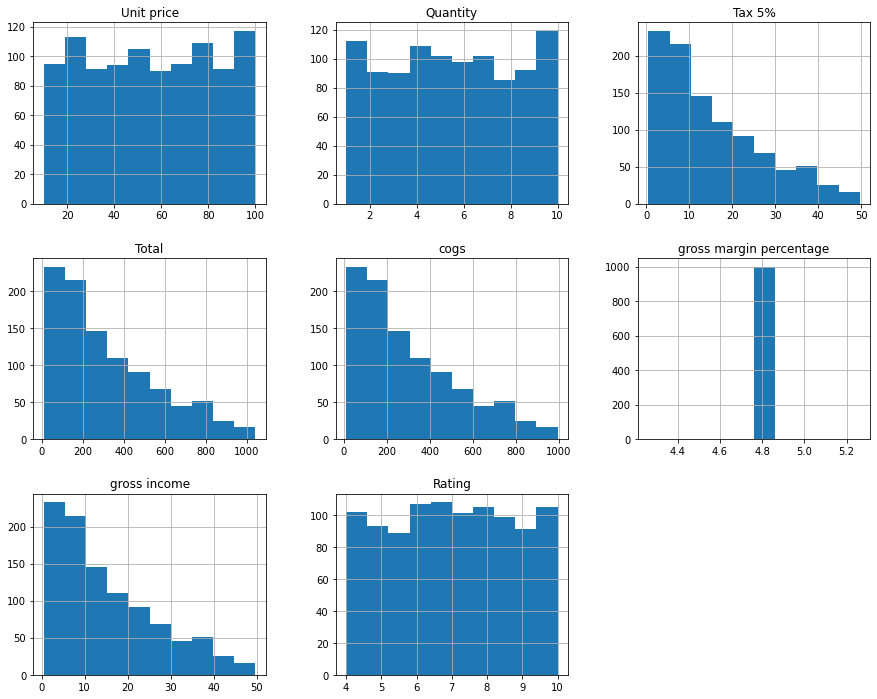

In [7]:
df.hist(figsize=(15,12))
plt.show()

Features Unit Price, Quantity and Rating are Uniformly distributed. 

Gross Margin percent for almost all products is same ie 4.8%.

Tax 5%, Total, cogs and Gross Income has similar distribution. More observations lie in smaller range.

<AxesSubplot:>

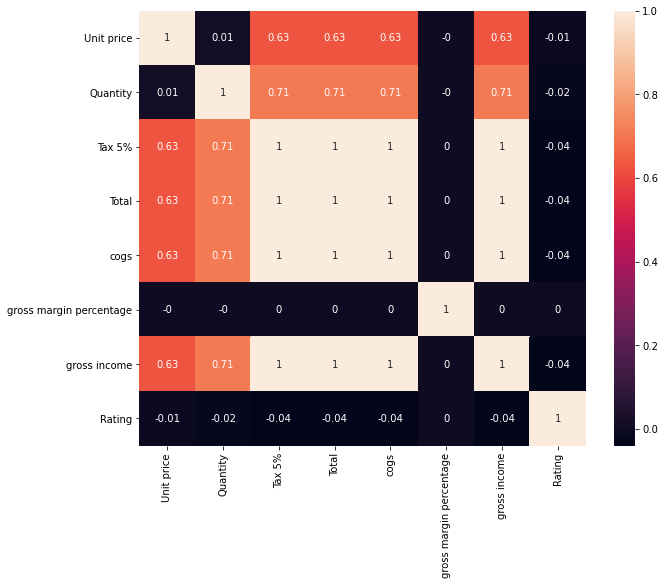

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2),annot=True)

Tax 5%, Total, cogs and Gross Income are perfectly positive correlated.

While Tax 5%, Total, cogs and Gross income are also postively correlated with Ubnit Price and Quantity.

In [9]:
## Description of numerical features

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
## Description of Categorical Features

df.describe(include='O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,207-73-1363,A,Yangon,Member,Female,Fashion accessories,2/7/2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


***Part-2:***

**1) Is your supermarket more popular with males or females?**

In [11]:
df.groupby('Gender')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,501.0,6.964471,1.755761,4.0,5.4,7.1,8.50,10.0
Male,499.0,6.980962,1.682146,4.0,5.6,6.9,8.45,10.0


Observing the above statistics I feel that the supermarket is slightly more popular among females than males. 
However there is not much significant difference among both the genders. As almost equal number of  males and females 
visit the supermarket.Also, the mean and median of Rating doesnot vary much.

**2) What does the customer rating look like and can you also comment on its skewness?**

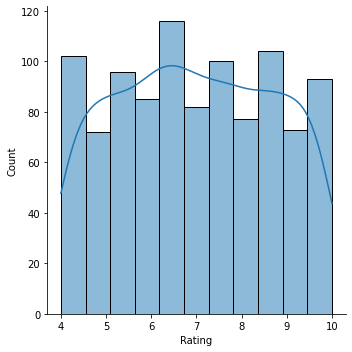

In [12]:
sns.displot(df['Rating'],kde=True)

In [13]:
(df['Rating']).skew()

0.00900964876573073

The ratings column has equal mean and median. Therefore, it can be said that it is symmetrically distributed.
Ratings distribution looks like Uniform distribution. This implies that Some people like the supermaket while some dont.

**3) What can you say about the aggregate sales across the branches?**

In [14]:
df.groupby('Branch')['Total'].mean()

Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64

Aggregate Sales from Branch C is maximum while from A is minimum.

**4) Which is the most popular payment method used by customers?**

In [15]:
df['Payment'].mode()

0    Ewallet
dtype: object

The most popular payment method used by customers is Ewallet.

***Part 3:***

**1) Does gross income affect customer ratings?**

In [16]:
(df['gross income']).corr(df['Rating'])

-0.036441704997018355

No, the Gross income doesnot affect the ratings.

**2) Which is the most profitable branch?**

In [17]:
df.groupby('Branch')['Total'].sum()

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

Most profitable branch is C branch.

**3) How is the relationship between Gender and Gross income?**

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

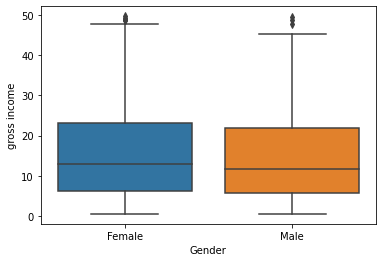

In [18]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

Gross income of men is slightly lower than women.

**4) Can you see any time trend in gross income?**

<AxesSubplot:xlabel='Date', ylabel='gross income'>

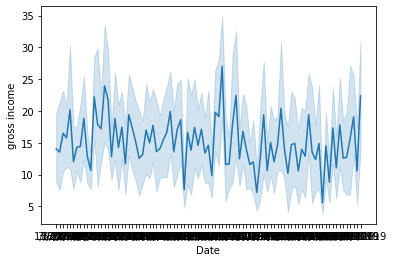

In [19]:
sns.lineplot(x=df['Date'],y=df['gross income'],data=df)

No time trend in gross income can be observed.

**5) Which product line helps you generate the most income?**

In [20]:
df.groupby('Product line')['Total'].sum()

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

'Food and beverages' product line helps generate the most income.

**6) What is the spending pattern of both males and females, meaning in which category do they spend more?**

<AxesSubplot:xlabel='Product line', ylabel='Total'>

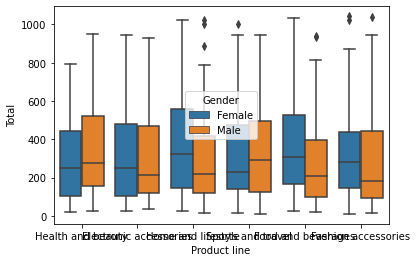

In [21]:
sns.boxplot(x=df['Product line'],y=df['Total'],hue= 'Gender',data=df)

In [22]:
df.groupby(['Product line','Gender'])['Total'].sum()

Product line            Gender
Electronic accessories  Female    27102.0225
                        Male      27235.5090
Fashion accessories     Female    30437.4000
                        Male      23868.4950
Food and beverages      Female    33170.9175
                        Male      22973.9265
Health and beauty       Female    18560.9865
                        Male      30632.7525
Home and lifestyle      Female    30036.8775
                        Male      23825.0355
Sports and travel       Female    28574.7210
                        Male      26548.1055
Name: Total, dtype: float64

Females spend more on Fashion accessories,Food and beverages,Home and lifestyle,Sports and travel then men. 

While men spend more on Electronic accessories,Health and beauty.       

Overall, Females spend more than males on shopping.


**7) How many products are bought by customers?**

In [23]:
df['Quantity'].sum()

5510

Total 5510 products are bought by customers.

**8) Which day of the week has maximum sales?**

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Dow']=df['Date'].dt.day_name()
df.groupby('Dow')['Total'].sum()

Dow
Friday       43926.3405
Monday       37899.0780
Saturday     56120.8095
Sunday       44457.8925
Thursday     45349.2480
Tuesday      51482.2455
Wednesday    43731.1350
Name: Total, dtype: float64

Saturday has maximum Sales. 

**9) Which hour of the day is busiest?**

In [28]:
df['Time']=pd.to_datetime(df['Time'])
df['Time'].value_counts(bins=24)

(2021-07-26 19:36:37.500000, 2021-07-26 20:04:05]              57
(2021-07-26 13:39:40, 2021-07-26 14:07:07.500000]              50
(2021-07-26 15:02:02.500000, 2021-07-26 15:29:30]              49
(2021-07-26 11:22:22.500000, 2021-07-26 11:49:50]              49
(2021-07-26 12:44:45, 2021-07-26 13:12:12.500000]              48
(2021-07-26 10:27:27.500000, 2021-07-26 10:54:55]              47
(2021-07-26 09:59:20.459999999, 2021-07-26 10:27:27.500000]    47
(2021-07-26 17:46:47.500000, 2021-07-26 18:14:15]              47
(2021-07-26 18:41:42.500000, 2021-07-26 19:09:10]              45
(2021-07-26 15:29:30, 2021-07-26 15:56:57.500000]              44
(2021-07-26 19:09:10, 2021-07-26 19:36:37.500000]              43
(2021-07-26 14:34:35, 2021-07-26 15:02:02.500000]              43
(2021-07-26 12:17:17.500000, 2021-07-26 12:44:45]              42
(2021-07-26 16:24:25, 2021-07-26 16:51:52.500000]              39
(2021-07-26 13:12:12.500000, 2021-07-26 13:39:40]              39
(2021-07-2

The hour 19:36:37 to 20:04:05 is probably the most busiest hour.

**10) Which product line should your supermarket focus on?**

In [29]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Fashion accessories is the product line should supermarket focus on.

**11) Which city should be chosen for expansion and what products should be focussed on?**

In [30]:
df.groupby(['City','Product line'])['Total'].sum()

City       Product line          
Mandalay   Electronic accessories    17051.4435
           Fashion accessories       16413.3165
           Food and beverages        15214.8885
           Health and beauty         19980.6600
           Home and lifestyle        17549.1645
           Sports and travel         19988.1990
Naypyitaw  Electronic accessories    18968.9745
           Fashion accessories       21560.0700
           Food and beverages        23766.8550
           Health and beauty         16615.3260
           Home and lifestyle        13895.5530
           Sports and travel         15761.9280
Yangon     Electronic accessories    18317.1135
           Fashion accessories       16332.5085
           Food and beverages        17163.1005
           Health and beauty         12597.7530
           Home and lifestyle        22417.1955
           Sports and travel         19372.6995
Name: Total, dtype: float64

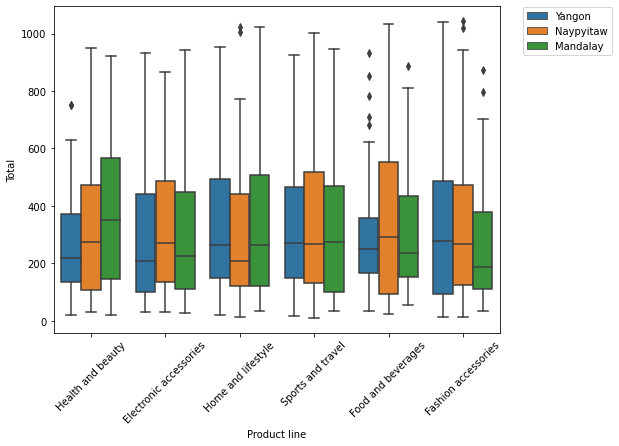

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Product line',y='Total',hue='City',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.xticks(rotation=45)
plt.show()

Food and beverages in city Naypyitaw must be focused more.  Health and beauty in City Mandalay can also be chosen.